In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
bookings = pd.read_csv('bookings.csv')
sessions = pd.read_csv('sessions.csv')


In [3]:
bookings.shape

(339, 13)

In [4]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [5]:
bookings.shape

(339, 13)

In [6]:
bookings.describe()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
count,339.000000,339.000000,339.000000,339.000000
mean,29327.460708,1.247788,22.348083,4574.309735
std,28148.851152,0.557854,36.412208,3119.033980
min,1402.400000,1.000000,0.000000,206.800000
25%,7237.530000,1.000000,3.000000,1125.800000
50%,23209.600000,1.000000,9.000000,6059.100000
75%,39669.200000,1.000000,24.500000,6867.850000
max,216646.400000,4.000000,311.000000,16520.300000


In [7]:
 sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [9]:
sessions.shape

(1497, 5)

In [10]:
sessions.describe()

,session_id,search_id,search_time,session_starting_time,booking_id
count,1497,1497,1497,1497,366
unique,331,1360,1357,333,338
top,session_118,search_569,2020-05-20T13:42:32Z,2018-10-11T12:38:29.186Z,booking_142
freq,70,8,8,70,2


In [11]:
#Find the number of distinct bookings, sessions, and searches from the given datasets.
#distinct bookings
dist_bookings = bookings['booking_id'].nunique()
print(f'Distinct Bookings: {dist_bookings}')

Distinct Bookings: 339


In [12]:
#Distinct sessions
dist_sessions = sessions['session_id'].nunique()
print(f'Distinct sessions: {dist_sessions}')

Distinct sessions: 331


In [13]:
#Distinct searches
dist_searches = sessions['search_id'].nunique()
print(f'Distinct searches: {dist_searches}')

Distinct searches: 1360


In [14]:
#sessions with more than one booking
session_counts = sessions['session_id'].value_counts()
session = session_counts[session_counts > 1].size
print(f'Sessions with more than one bookings: {session}')

Sessions with more than one bookings: 237


In [15]:
#Which days of the week have the highest number of bookings
bookings.booking_time = pd.to_datetime(bookings.booking_time)
bookings['days'] = bookings['booking_time'].dt.day_name()
booking_days =pd.DataFrame({'book_id':bookings['booking_id'], 'Days': bookings['days']})
booking_days

,book_id,Days
0,booking_82,Wednesday
1,booking_156,Wednesday
2,booking_99,Monday
3,booking_319,Friday
4,booking_222,Tuesday
...,...,...
334,booking_238,Friday
335,booking_37,Saturday
336,booking_239,Friday
337,booking_131,Thursday


In [16]:
group = pd.DataFrame(booking_days.groupby(booking_days['Days'])['book_id'].count().reset_index())
group

,Days,book_id
0,Friday,51
1,Monday,51
2,Saturday,44
3,Sunday,35
4,Thursday,65
5,Tuesday,59
6,Wednesday,34


In [17]:
day_max =group.loc[group['book_id'].idxmax(), 'Days']
print(f'Day of the week with highest number of bookings is: {day_max}')

Day of the week with highest number of bookings is: Thursday


<function matplotlib.pyplot.show(close=None, block=None)>

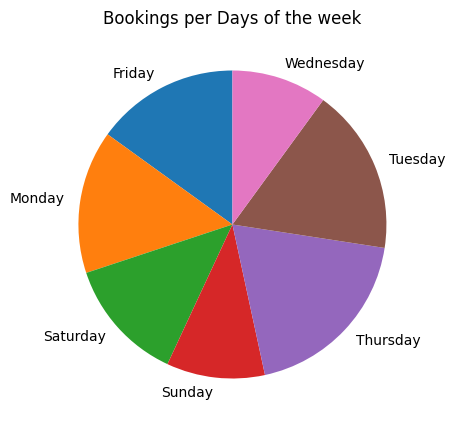

In [18]:
#pie plot
plt.figure(figsize=(8,5))
plt.pie(group['book_id'],labels = group['Days'],startangle = 90)
plt.title('Bookings per Days of the week')
plt.show
#plt.legend()

In [19]:
#For each of the service names, display the total number of bookings and the total Gross Booking Value in INR
service_INR = pd.DataFrame(bookings.groupby('service_name')['INR_Amount'].sum().reset_index())
service_INR

,service_name,INR_Amount
0,GOIBIBO,5897637.97
1,MMT,665669.08
2,YATRA,3378702.13


In [72]:
print(f'Gross booking value for GOIBIBO in INR: {service_INR.loc[0,'INR_Amount']}')
print(f'\nGross booking value for MMT in INR: {service_INR.loc[1,'INR_Amount']}')
print(f'\nGross booking value for YATRA in INR: {service_INR.loc[2,'INR_Amount']}')       

Gross booking value for GOIBIBO in INR: 5897637.97

Gross booking value for MMT in INR: 665669.08

Gross booking value for YATRA in INR: 3378702.13


In [21]:
service_total_bookings = pd.DataFrame(bookings.groupby('service_name')['booking_id'].count().reset_index())
service_total_bookings

,service_name,booking_id
0,GOIBIBO,186
1,MMT,48
2,YATRA,105


In [22]:
print(f'Total number of bookings  for GOIBIBO is: {service_total_bookings.loc[0,'booking_id']}')
print(f'\nTotal number of bookings  for MMT is: {service_total_bookings.loc[1,'booking_id']}')
print(f'\nTotal number of bookings  for YATRA is: {service_total_bookings.loc[2,'booking_id']}')

Total number of bookings  for GOIBIBO is: 186

Total number of bookings  for MMT is: 48

Total number of bookings  for YATRA is: 105


In [23]:
#For customers who have more than 1 booking, which is the most booked route(from_city to to_city)?
route_df = pd.DataFrame({'cust_id': bookings.customer_id, 'from': bookings.from_city, 'to': bookings.to_city})
route_df

,cust_id,from,to
0,customer_259,Gurgaon,Ahmedabad
1,customer_303,Delhi,Brussels
2,customer_203,Devanhalli,Frankfurt am Main
3,customer_211,Gurgaon,Frankfurt am Main
4,customer_287,Gurgaon,Roissy-en-France
...,...,...,...
334,customer_133,Gurgaon,Rāja Sānsi
335,customer_235,Gurgaon,Bhubaneswar
336,customer_62,Gurgaon,Birmingham
337,customer_5,Mumbai,Kloten


In [24]:
cust_counts = route_df.cust_id.value_counts()
cust_counts

cust_id
customer_97     4
customer_246    3
customer_160    3
customer_176    3
customer_230    3
               ..
customer_107    1
customer_43     1
customer_271    1
customer_169    1
customer_241    1
Name: count, Length: 306, dtype: int64

In [25]:
single_occurance_cust = cust_counts[cust_counts == 1].index
single_occurance_cust

Index(['customer_153', 'customer_91', 'customer_163', 'customer_281',
       'customer_54', 'customer_126', 'customer_4', 'customer_192',
       'customer_7', 'customer_210',
       ...
       'customer_161', 'customer_150', 'customer_111', 'customer_178',
       'customer_197', 'customer_107', 'customer_43', 'customer_271',
       'customer_169', 'customer_241'],
      dtype='object', name='cust_id', length=280)

In [26]:
filtered_df = route_df[~route_df['cust_id'].isin(single_occurance_cust)]
filtered_df

,cust_id,from,to
6,customer_28,Kolkata,Gurgaon
7,customer_217,Bhubaneswar,Durlaga
13,customer_282,Indore,Mumbai
16,customer_179,Gurgaon,Port Blair
24,customer_179,Mumbai,Jaipur
29,customer_247,Gurgaon,Fiumicino
42,customer_137,Gurgaon,Birmingham
48,customer_49,Gurgaon,Roissy-en-France
55,customer_245,Pune,Nagpur
65,customer_246,Delhi,Paris


In [27]:
print(f'Most booked from_city: {filtered_df['from'].mode()[0]}')
print(f'\nMost booked to_city: {filtered_df['to'].mode()[0]}')


Most booked from_city: Gurgaon

Most booked to_city: Gurgaon


In [28]:
# top 3 departure cities from where customers book mostly in advance
advance_df = pd.DataFrame({'from_cty': bookings.from_city, 'days_to': bookings.days_to_departure})
advance_df

,from_cty,days_to
0,Gurgaon,10.0
1,Delhi,1.0
2,Devanhalli,32.0
3,Gurgaon,69.0
4,Gurgaon,3.0
...,...,...
334,Gurgaon,26.0
335,Gurgaon,0.0
336,Gurgaon,109.0
337,Mumbai,22.0


In [29]:
#remove cities with less than 5 departures
from_counts = advance_df['from_cty'].value_counts()
filter_cities = from_counts[from_counts >= 5].index
advance_df = advance_df[advance_df['from_cty'].isin(filter_cities)]
advance_df

,from_cty,days_to
0,Gurgaon,10.0
1,Delhi,1.0
2,Devanhalli,32.0
3,Gurgaon,69.0
4,Gurgaon,3.0
...,...,...
334,Gurgaon,26.0
335,Gurgaon,0.0
336,Gurgaon,109.0
337,Mumbai,22.0


In [30]:
#drop rows where customers don't book in advance
advance_df = advance_df.loc[advance_df['days_to'] != 0]
advance_df

,from_cty,days_to
0,Gurgaon,10.0
1,Delhi,1.0
2,Devanhalli,32.0
3,Gurgaon,69.0
4,Gurgaon,3.0
...,...,...
333,Devanhalli,2.0
334,Gurgaon,26.0
336,Gurgaon,109.0
337,Mumbai,22.0


In [31]:
rank_list = advance_df['from_cty'].value_counts()
rank_list

from_cty
Gurgaon        131
Mumbai          34
Delhi           29
Devanhalli      24
Rāja Sānsi      17
Chennai         16
Ahmedabad        8
New Delhi        7
Madhyamgram      6
Bālāpur          6
Name: count, dtype: int64

In [32]:
#top three cities
print (f'Top three cities where customers book in advance:')
print(f'\nGurgaon - {int(rank_list['Gurgaon'])} customers')
print(f'Mumbai - {int(rank_list['Mumbai'])} customers' )
print(f'Delhi - {int(rank_list['Delhi'])} customers ')

Top three cities where customers book in advance:

Gurgaon - 131 customers
Mumbai - 34 customers
Delhi - 29 customers 


In [33]:
#heatmap correlation of numerical columns
categorical_columns = bookings.select_dtypes(include=['object']).columns
categorical_columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'device_type_used', 'service_name', 'days'],
      dtype='object')

In [34]:
numerical_df = bookings.drop(columns=categorical_columns)
numerical_df

,booking_time,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2020-02-05 16:12:08+00:00,2565.28,1.0,10.0,747.8
1,2018-11-21 08:21:47+00:00,23120.00,1.0,1.0,6701.5
2,2019-12-16 22:54:58+00:00,25717.60,1.0,32.0,7712.0
3,2021-10-29 12:25:38+00:00,135969.60,2.0,69.0,6112.5
4,2020-08-11 16:09:10+00:00,31791.20,1.0,3.0,6570.4
...,...,...,...,...,...
334,2020-02-14 14:20:20+00:00,2721.60,1.0,26.0,421.0
335,2020-03-21 06:40:56+00:00,6552.00,1.0,0.0,1274.7
336,2020-01-31 20:35:35+00:00,126502.46,2.0,109.0,7190.9
337,2018-10-11 14:31:28+00:00,55152.80,2.0,22.0,6760.0


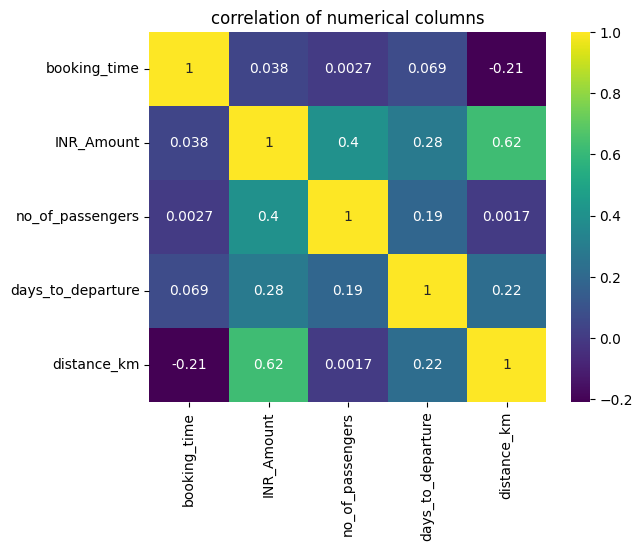

In [35]:
correlation_matrix = numerical_df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('correlation of numerical columns')
plt.show() 

In [36]:
print('pair of columns with maximum correlation: distance_km and INR_Amount')

pair of columns with maximum correlation: distance_km and INR_Amount


In [37]:
#most used device for each service
x = bookings[['device_type_used','service_name']]
service_name_group = x.groupby('service_name')['device_type_used'].value_counts()
service_name_group

service_name  device_type_used
GOIBIBO       IOS                 70
              Desktop             61
              Android             44
              MobileWeb           11
MMT           Desktop             30
              Android              8
              IOS                  5
              MobileWeb            5
YATRA         Desktop             51
              IOS                 22
              Android             18
              MobileWeb           11
              Tablet               3
Name: count, dtype: int64

In [38]:
print(f'Most used device for GOIBIBO: {service_name_group.loc['GOIBIBO'].idxmax()}')
print(f'\nMost used device for MMT: {service_name_group.loc['MMT'].idxmax()}')
print(f'\nMost used device for YATRA: {service_name_group.loc['YATRA'].idxmax()}')

Most used device for GOIBIBO: IOS

Most used device for MMT: Desktop

Most used device for YATRA: Desktop


In [39]:
#e trends at a quarterly frequency for the number of bookings by each of the device types
bookings['months'] = bookings['booking_time'].dt.month_name()
bookings.months

0      February
1      November
2      December
3       October
4        August
         ...   
334    February
335       March
336     January
337     October
338        July
Name: months, Length: 339, dtype: object

In [40]:
bookings.groupby('months')['device_type_used'].value_counts()

months     device_type_used
April      Desktop              5
           IOS                  4
           Android              2
August     Desktop              4
           Android              3
           IOS                  1
December   IOS                 16
           Desktop             14
           Android             13
           MobileWeb            2
February   Desktop             21
           IOS                 13
           Android              8
           MobileWeb            8
January    Desktop             23
           IOS                 15
           Android              8
           MobileWeb            3
July       IOS                  6
           Desktop              5
           Android              1
June       Desktop              8
           Android              2
           IOS                  2
           Tablet               1
March      IOS                 12
           Android              5
           Desktop              5
           MobileWeb

In [41]:
z = pd.crosstab(bookings.months,bookings.device_type_used)
z

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
months,,,,,
April,2,5,4,0,0
August,3,4,1,0,0
December,13,14,16,2,0
February,8,21,13,8,0
January,8,23,15,3,0
July,1,5,6,0,0
June,2,8,2,0,1
March,5,5,12,2,0
May,2,0,3,1,0


In [42]:
quarter_1 = z.loc[['January','February','March']]
quarter_1

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
months,,,,,
January,8,23,15,3,0
February,8,21,13,8,0
March,5,5,12,2,0


In [43]:
a1 = int(quarter_1.Android.sum())
d1 =  int(quarter_1.Desktop.sum())
i1 =  int(quarter_1.IOS.sum())
m1 =  int(quarter_1.MobileWeb.sum())
t1 =  int(quarter_1.Tablet.sum())

In [44]:
quarter_2 = z.loc[['April','May','June']]
quarter_2

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
months,,,,,
April,2,5,4,0,0
May,2,0,3,1,0
June,2,8,2,0,1


In [45]:
a2 =  int(quarter_2.Android.sum())
d2 =  int(quarter_2.Desktop.sum())
i2 =  int(quarter_2.IOS.sum())
m2 =  int(quarter_2.MobileWeb.sum())
t2 =  int(quarter_2.Tablet.sum())

In [46]:
quarter_3 = z.loc[['July','August','September']]
quarter_3

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
months,,,,,
July,1,5,6,0,0
August,3,4,1,0,0
September,10,12,7,4,1


In [47]:
a3 =  int(quarter_3.Android.sum())
d3 =  int(quarter_3.Desktop.sum())
i3 =  int(quarter_3.IOS.sum())
m3 =  int(quarter_3.MobileWeb.sum())
t3 =  int(quarter_3.Tablet.sum())

In [48]:
quarter_4 = z.loc[['October','November','December']]
quarter_4

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
months,,,,,
October,7,26,10,4,1
November,9,19,8,3,0
December,13,14,16,2,0


In [49]:
a4 =  int(quarter_4.Android.sum())
d4 =  int(quarter_4.Desktop.sum())
i4 =  int(quarter_4.IOS.sum())
m4 =  int(quarter_4.MobileWeb.sum())
t4 =  int(quarter_4.Tablet.sum())

In [50]:
android_data_points =[a1,a2,a3,a4]
android_data_points

[21, 6, 14, 29]

In [51]:
desktop_data_points = [d1,d2,d3,d4]
desktop_data_points

[49, 13, 21, 59]

In [52]:
IOS_data_points = [i1,i2,i3,i4]
IOS_data_points

[40, 9, 14, 34]

In [53]:
mobileweb_data_points = [m1,m2,m3,m4]
mobileweb_data_points

[13, 1, 4, 9]

In [54]:
tablet_data_points = [t1,t2,t3,t4]
tablet_data_points

[0, 1, 1, 1]

In [55]:
quarters = ['1st','2nd','3rd','4th']
quarters

['1st', '2nd', '3rd', '4th']

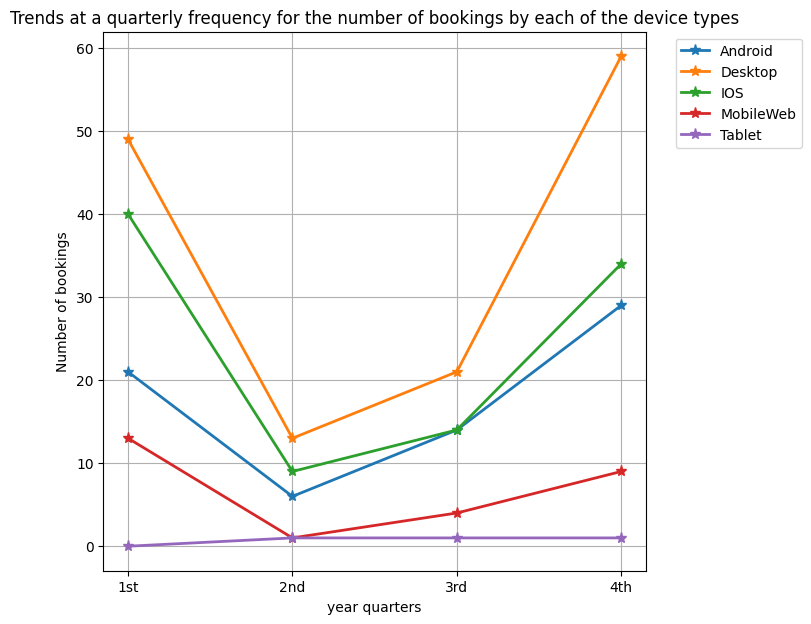

In [56]:
plt.figure(figsize=(7,7))
plt.plot(quarters, android_data_points, linewidth =2, marker='*' , markersize = 8, 
         label = "Android" )
plt.plot(quarters,desktop_data_points, linewidth =2, marker='*', markersize = 8,
        label = "Desktop")
plt.plot(quarters,IOS_data_points, linewidth =2, marker='*', markersize = 8,
        label = "IOS")
plt.plot(quarters,mobileweb_data_points, linewidth =2, marker='*', markersize = 8,
        label = "MobileWeb")
plt.plot(quarters,tablet_data_points, linewidth =2, marker='*', markersize = 8,
        label = "Tablet")
plt.xlabel("year quarters")
plt.ylabel("Number of bookings")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1) ) # to move the default position of the legend on the graphplt.legend(loc="upper right", bbox_to_anchor=(1.3,1) ) # to move the default position of the legend on the graph
plt.title("Trends at a quarterly frequency for the number of bookings by each of the device types")
plt.grid(True)
plt.show()

In [57]:
sessions 

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [58]:
sessions.booking_id.isnull().value_counts()

booking_id
True     1131
False     366
Name: count, dtype: int64

In [59]:
 sessions.search_time.isnull().value_counts()

search_time
False    1497
Name: count, dtype: int64

In [60]:
sessions['booking_id'] = np.where(sessions['booking_id'].isnull(), 0, 1)
sessions 

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,0
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,0
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,0
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,0
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,0
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,1
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,0
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,0
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,0


In [61]:
sessions['search_time'] = pd.to_datetime(sessions['search_time'], format='ISO8601')
sessions['months'] = sessions['search_time'].dt.month_name()
sessions['days'] = sessions['search_time'].dt.day_name()
sessions.months = sessions['search_time'].dt.month_name()
sessions 

,session_id,search_id,search_time,session_starting_time,booking_id,months,days
0,session_322,search_784,2020-01-21 21:35:38.910000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday
1,session_322,search_776,2020-01-21 21:37:37.697000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday
2,session_322,search_623,2020-01-21 21:36:11.392000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday
3,session_322,search_270,2020-01-21 21:16:07.685000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday
4,session_322,search_905,2020-01-21 21:34:55.673000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday
...,...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18 22:59:43.764000+00:00,2018-12-18T22:45:56Z,1,December,Tuesday
1493,session_120,search_1096,2021-12-23 17:29:37+00:00,2021-12-23T17:29:33.217Z,0,December,Thursday
1494,session_120,search_962,2021-12-23 17:34:39+00:00,2021-12-23T17:29:33.217Z,0,December,Thursday
1495,session_150,search_1306,2018-12-18 22:52:37.654000+00:00,2018-12-18T22:45:56Z,0,December,Tuesday


In [62]:
sessions.groupby('months')['booking_id'].value_counts()

months     booking_id
April      0              29
           1              11
August     0              21
           1               9
December   0             149
           1              50
February   0             125
           1              52
January    0             156
           1              55
July       0              67
           1              13
June       0              20
           1              13
March      0              78
           1              27
May        0              27
           1               6
November   0             140
           1              41
October    0             263
           1              54
September  0              56
           1              35
Name: count, dtype: int64

In [63]:
oBSR_df1 = pd.crosstab(sessions.months,sessions.booking_id)
oBSR_df1

booking_id,0,1
months,,
April,29,11
August,21,9
December,149,50
February,125,52
January,156,55
July,67,13
June,20,13
March,78,27
May,27,6


In [64]:
oBSR_df1 = pd.crosstab(sessions.months,sessions.booking_id)
oBSR_df1['oBSR_months'] = oBSR_df1[1] / (oBSR_df1[0] + oBSR_df1[1])
oBSR_df1

booking_id,0,1,oBSR_months
months,,,
April,29,11,0.275000
August,21,9,0.300000
December,149,50,0.251256
February,125,52,0.293785
January,156,55,0.260664
July,67,13,0.162500
June,20,13,0.393939
March,78,27,0.257143
May,27,6,0.181818


In [65]:
sessions.groupby('days')['booking_id'].value_counts()

days       booking_id
Friday     0             146
           1              57
Monday     0             200
           1              54
Saturday   0             151
           1              49
Sunday     0              75
           1              38
Thursday   0             222
           1              70
Tuesday    0             156
           1              62
Wednesday  0             181
           1              36
Name: count, dtype: int64

In [66]:
oBSR_df2 = pd.crosstab(sessions.days,sessions.booking_id)
oBSR_df2['oBSR_days_of_week'] = oBSR_df2[1] / (oBSR_df2[0] + oBSR_df2[1])
oBSR_df2

booking_id,0,1,oBSR_days_of_week
days,,,
Friday,146,57,0.280788
Monday,200,54,0.212598
Saturday,151,49,0.245000
Sunday,75,38,0.336283
Thursday,222,70,0.239726
Tuesday,156,62,0.284404
Wednesday,181,36,0.165899


In [67]:
sessions['all_dates'] = sessions['search_time'].dt.date
sessions 

,session_id,search_id,search_time,session_starting_time,booking_id,months,days,all_dates
0,session_322,search_784,2020-01-21 21:35:38.910000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday,2020-01-21
1,session_322,search_776,2020-01-21 21:37:37.697000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday,2020-01-21
2,session_322,search_623,2020-01-21 21:36:11.392000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday,2020-01-21
3,session_322,search_270,2020-01-21 21:16:07.685000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday,2020-01-21
4,session_322,search_905,2020-01-21 21:34:55.673000+00:00,2020-01-21T21:10:12Z,0,January,Tuesday,2020-01-21
...,...,...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18 22:59:43.764000+00:00,2018-12-18T22:45:56Z,1,December,Tuesday,2018-12-18
1493,session_120,search_1096,2021-12-23 17:29:37+00:00,2021-12-23T17:29:33.217Z,0,December,Thursday,2021-12-23
1494,session_120,search_962,2021-12-23 17:34:39+00:00,2021-12-23T17:29:33.217Z,0,December,Thursday,2021-12-23
1495,session_150,search_1306,2018-12-18 22:52:37.654000+00:00,2018-12-18T22:45:56Z,0,December,Tuesday,2018-12-18


In [68]:
sessions.groupby('all_dates')['booking_id'].value_counts()

all_dates   booking_id
2018-09-04  0             2
            1             1
2018-09-11  1             2
2018-09-21  0             3
            1             2
                         ..
2022-07-01  1             1
2022-07-06  0             8
            1             1
2022-07-11  1             2
            0             1
Name: count, Length: 446, dtype: int64

In [69]:
oBSR_df3 = pd.crosstab(sessions.all_dates,sessions.booking_id)
oBSR_df3

booking_id,0,1
all_dates,,
2018-09-04,2,1
2018-09-11,0,2
2018-09-21,3,2
2018-09-23,0,1
2018-09-24,2,1
...,...,...
2022-06-04,0,1
2022-06-29,10,2
2022-07-01,3,1


In [70]:
oBSR_df3 = pd.crosstab(sessions.all_dates,sessions.booking_id)
oBSR_df3['oBSR_all_dates'] = oBSR_df3[1] / (oBSR_df3[0] + oBSR_df3[1])
oBSR_df3

booking_id,0,1,oBSR_all_dates
all_dates,,,
2018-09-04,2,1,0.333333
2018-09-11,0,2,1.000000
2018-09-21,3,2,0.400000
2018-09-23,0,1,1.000000
2018-09-24,2,1,0.333333
...,...,...,...
2022-06-04,0,1,1.000000
2022-06-29,10,2,0.166667
2022-07-01,3,1,0.250000


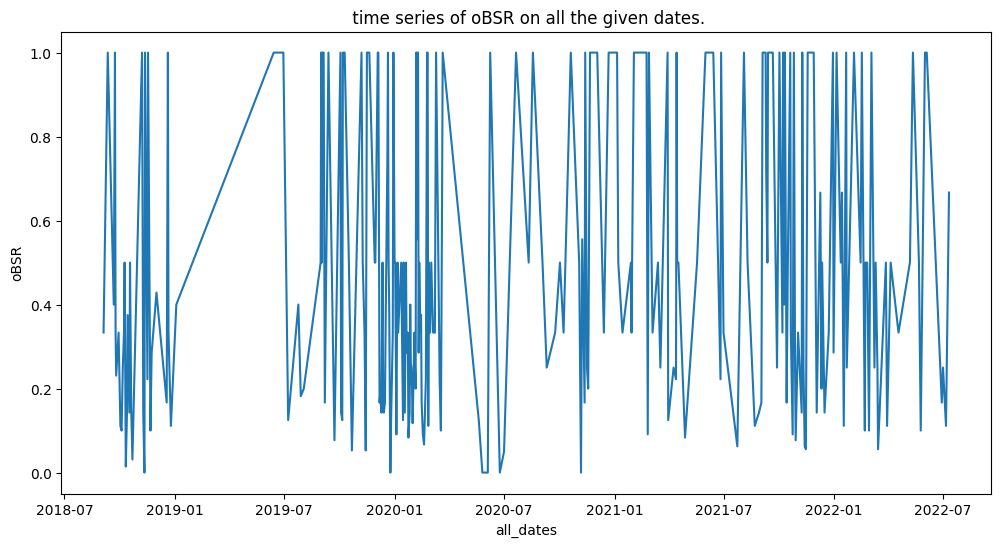

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(oBSR_df3['oBSR_all_dates'])
plt.xlabel("all_dates")
plt.ylabel("oBSR")
plt.title(" time series of oBSR on all the given dates.")
plt.show()